In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import random
from collections import deque
from tqdm import tqdm
import pandas as pd
import copy
from IPython.display import clear_output


In [2]:
def P_0_matrix(x):
    P_0_matrix=np.array([[1-x,x,0,0,0],
                   [1-x,0,x,0,0],
                   [1-x,0,0,x,0],
                   [1-x,0,0,0,x],
                   [1-x,0,0,0,x]])
    return P_0_matrix

In [3]:
P_1_matrix=np.array([[1,0,0,0,0],
                   [1,0,0,0,0],
                   [1,0,0,0,0],
                   [1,0,0,0,0],
                   [1,0,0,0,0]])
P_1_matrix

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0]])

In [4]:
def reward_matrix(x):
    reward_matrix=[[x**1,0],[x**2,0],[x**3,0],[x**4,0],[x**5,0]]
    return reward_matrix

In [5]:
action_space=[0,1]
state_space=[0,1,2,3,4]
classes=2
N=15 # 10 of class 1 and 5 of class 2
M=6.0
epsilon=0.1
subsidy=0
arm_indexes=[i for i in range(N)]
gamma=0.99
prob=M/N

In [6]:
def step(state,state_space,action,P_0_matrix,P_1_matrix,reward_matrix):
  new_state=state
  if(action==1):
    new_state=np.random.choice(state_space,replace=True,p=P_1_matrix[state])
    reward=reward_matrix[state][1]
  else:
    new_state=np.random.choice(state_space,replace=True,p=P_0_matrix[state])
    reward=reward_matrix[state][0]
  return [new_state,reward]

In [7]:
Q_values=[]
for i in range(0,classes):
  Q_values.append(reward_matrix((i+0.8)/10.0))

Q_values

[[[0.08, 0],
  [0.0064, 0],
  [0.0005120000000000001, 0],
  [4.096e-05, 0],
  [3.2768000000000005e-06, 0]],
 [[0.18, 0],
  [0.0324, 0],
  [0.0058319999999999995, 0],
  [0.0010497599999999998, 0],
  [0.00018895679999999997, 0]]]

In [8]:
def Q_value_update(Q_values,state,next_state,action,reward,arm_index,subsidy,alpha):
  if action==1:
    Q_values[arm_index][state][action]=(1-alpha)*(Q_values[arm_index][state][action])+alpha*(reward+max(Q_values[arm_index][next_state])-(np.array(Q_values[arm_index]).sum())/10)
    return Q_values

  else:
    Q_values[arm_index][state][action]=(1-alpha)*(Q_values[arm_index][state][action])+alpha*(reward+subsidy+max(Q_values[arm_index][next_state])-(np.array(Q_values[arm_index]).sum())/10)
    return Q_values




In [9]:
def act(Q_values,epsilon,state,arm_index):
  decision=np.random.binomial(n=1,p=epsilon,size=1)
  if decision==1:
    action=random.choice([0,1])
  else:
    action=np.argmax(Q_values[arm_index][state])
  return action

In [10]:
alternative_indexes=[0 for _ in range(N)]
current_state=[0 for _ in range(classes)]

In [11]:
nu=np.zeros((N,len(state_space),len(action_space)))


In [12]:
rewards=[]
subsidies=[]
action_avgs=[]
betas=[]
alphas=[]
epsilon=0.1


In [13]:
def alpha(i):
    return 1/np.ceil(1+(i/10000))

In [14]:
reward_sum=0
action_sum=[0 for _ in range(classes)]
total_action_sum=0
for i in range(1,10000001):
    # top_M_indices=act(alternative_indexes,N,M,epsilon)
    # alpha=1/(1+(i/500))
    if i%50==0:
        beta=1/(1+np.ceil(i*np.log(i)/10000))
    else:
      beta=0
    action_sum_flag=0

    for index in range(classes):
        action=act(Q_values,epsilon,current_state[index],index)
        action_sum[index]+=action


        x=step(current_state[index],state_space,action,P_0_matrix((index+0.8)/10.0),P_1_matrix,reward_matrix((index+0.8)/10.0))
        new_state=x[0]
        reward=x[1]

        Q_value_update(Q_values,current_state[index],new_state,action,reward,index,subsidy,alpha(nu[index][current_state[index],action]))
        nu[index][current_state[index],action]=nu[index][current_state[index],action]+1
        current_state[index]=new_state
        reward_sum+=reward

        #print(x)
    # print(i)
    #print(reward_sum)
    if i%100000==0:
      print(i)
    total_action_sum=(2*action_sum[0]+action_sum[1])/3
    subsidy+=beta*(2*action_sum[0]/(3*i)+action_sum[1]/(3*i)-prob)
    subsidies.append(subsidy)
    # epsilon=epsilon*gamma
    # if epsilon<=0.01:
    #     epsilon=0.01
    rewards.append(reward_sum/i)
    action_avgs.append(total_action_sum/i)
    # betas.append(beta)
    clear_output(wait=True)






100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000
1800000
1900000
2000000
2100000
2200000
2300000
2400000
2500000
2600000
2700000
2800000
2900000
3000000
3100000
3200000
3300000
3400000
3500000
3600000
3700000
3800000
3900000
4000000
4100000
4200000
4300000
4400000
4500000
4600000
4700000
4800000
4900000
5000000
5100000
5200000
5300000
5400000
5500000
5600000
5700000
5800000
5900000
6000000
6100000
6200000
6300000
6400000
6500000
6600000
6700000
6800000
6900000
7000000
7100000
7200000
7300000
7400000
7500000
7600000
7700000
7800000
7900000
8000000
8100000
8200000
8300000
8400000
8500000
8600000
8700000
8800000
8900000
9000000
9100000
9200000
9300000
9400000
9500000
9600000
9700000
9800000
9900000
10000000


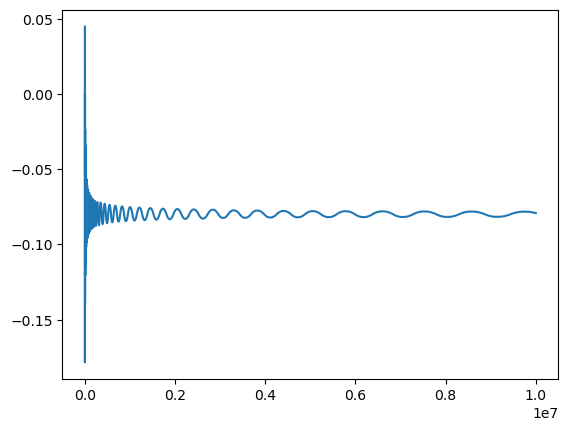

In [15]:
plt.plot(subsidies)


In [16]:
df=pd.DataFrame(rewards)


Text(0.5, 1.0, ' Moving Average of reward for Heterogeneous Restart Example ')

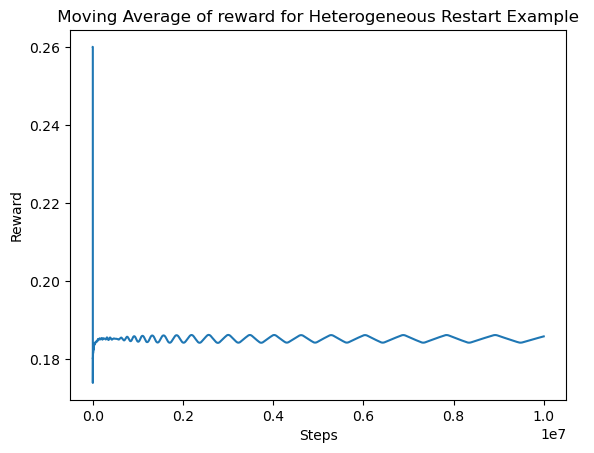

In [17]:
plt.plot(df[0].rolling(100000,min_periods=1).mean())
plt.xlabel('Steps')
plt.ylabel('Reward')
plt.title(' Moving Average of reward for Heterogeneous Restart Example ')


Text(0.5, 1.0, ' Moving Average of number of arms activated - Restart Arms (Heterogeneous)')

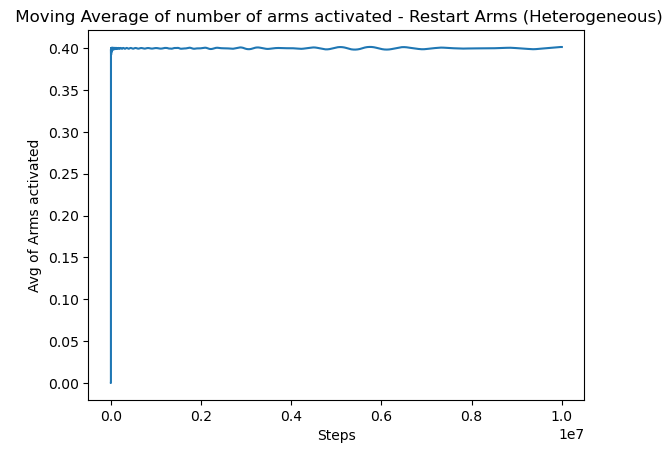

In [29]:
df['action_sums']=action_avgs
plt.plot(df['action_sums'].rolling(1000000,min_periods=1).mean())
plt.xlabel('Steps')
plt.ylabel('Avg of Arms activated')
plt.title(' Moving Average of number of arms activated - Restart Arms (Heterogeneous)')


Text(0.5, 1.0, 'Subsidy vs Steps for Heterogeneous Restart Example')

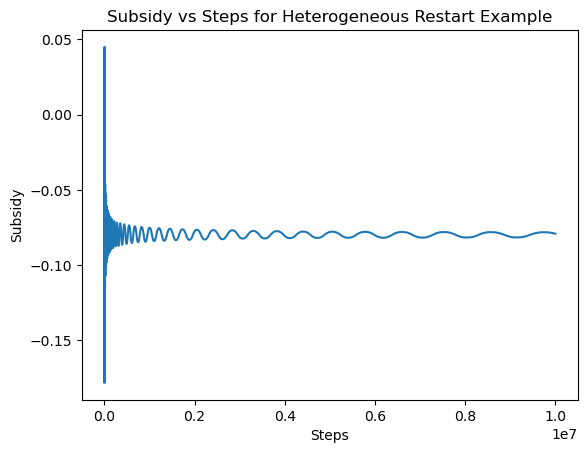

In [19]:
plt.plot(subsidies)
plt.xlabel('Steps')
plt.ylabel('Subsidy')
plt.title('Subsidy vs Steps - Restart Arms (Heterogeneous)')

In [20]:
arm_indexes=[i for i in range(N)]


In [21]:
#using learnt indices
current_state=[0 for _ in range(N)]
reward_sums_alt_index=[]
alternative_indexes=[0 for _ in range(N)]
for i in range(1,10001):
  reward_sum_alt_index=0
  reward_sum_whittle_index=0
  for index in arm_indexes:
    if index<10:
      alternative_indexes[index]=Q_values[0][current_state[index]][1]-Q_values[0][current_state[index]][0]
    else:
      alternative_indexes[index]=Q_values[1][current_state[index]][1]-Q_values[1][current_state[index]][0]
  indices_to_pull = sorted(range(len(alternative_indexes)), key = lambda j: alternative_indexes[j])[-int(M):]
  for index in arm_indexes:
    if index in indices_to_pull:
      if index<10:
        x=step(current_state[index],state_space,1,P_0_matrix(0.8),P_1_matrix,reward_matrix(0.8))
        new_state=x[0]
        reward=x[1]
        current_state[index]=new_state
        reward_sum_alt_index+=reward
      else:
        x=step(current_state[index],state_space,1,P_0_matrix(0.9),P_1_matrix,reward_matrix(0.9))
        new_state=x[0]
        reward=x[1]
        current_state[index]=new_state
        reward_sum_alt_index+=reward
    else:
      if index<10:
        x=step(current_state[index],state_space,0,P_0_matrix(0.8),P_1_matrix,reward_matrix(0.8))
        new_state=x[0]
        reward=x[1]
        current_state[index]=new_state
        reward_sum_alt_index+=reward
      else:
        x=step(current_state[index],state_space,0,P_0_matrix(0.9),P_1_matrix,reward_matrix(0.9))
        new_state=x[0]
        reward=x[1]
        current_state[index]=new_state
        reward_sum_alt_index+=reward
  reward_sums_alt_index.append(reward_sum_alt_index)


In [22]:
whittle_indexes=[[-0.7999999939285084,
 -0.5086695852261819,
 -0.198400950853426,
 0.0943789383042964,
 0.33831136151900687],[-0.8999999857150341,
 -0.7280899048807282,
 -0.5063880276153208,
 -0.26469859446651006,
 -0.02349460739783953]]

In [23]:
reward_sums_whittle_index=[]
whittle_index_arms=[0 for _ in range(N)]
current_state=[0 for _ in range(N)]
for i in range(1,10001):
  reward_sum_whittle_index=0
  for index in arm_indexes:
    if index<10:
      whittle_index_arms[index]=whittle_indexes[0][current_state[index]]
    else:
      whittle_index_arms[index]=whittle_indexes[1][current_state[index]]
  #print(whittle_index_arms)
  indices_to_pull = sorted(range(len(whittle_index_arms)), key = lambda j: whittle_index_arms[j])[-int(M):]
  # print(indices_to_pull)
  for index in arm_indexes:
    if index in indices_to_pull:
      if index<10:
        x=step(current_state[index],state_space,1,P_0_matrix(0.8),P_1_matrix,reward_matrix(0.8))
        new_state=x[0]
        reward=x[1]
        current_state[index]=new_state
        reward_sum_whittle_index+=reward
      else:
        x=step(current_state[index],state_space,1,P_0_matrix(0.9),P_1_matrix,reward_matrix(0.9))
        new_state=x[0]
        reward=x[1]
        current_state[index]=new_state
        reward_sum_whittle_index+=reward
    else:
      if index<10:
        x=step(current_state[index],state_space,0,P_0_matrix(0.8),P_1_matrix,reward_matrix(0.8))
        new_state=x[0]
        reward=x[1]
        current_state[index]=new_state
        reward_sum_whittle_index+=reward
      else:
        x=step(current_state[index],state_space,0,P_0_matrix(0.9),P_1_matrix,reward_matrix(0.9))
        new_state=x[0]
        reward=x[1]
        current_state[index]=new_state
        reward_sum_whittle_index+=reward
  reward_sums_whittle_index.append(reward_sum_whittle_index)

Text(0.5, 1.0, ' Moving Average of reward for Heterogeneous Restart Example ')

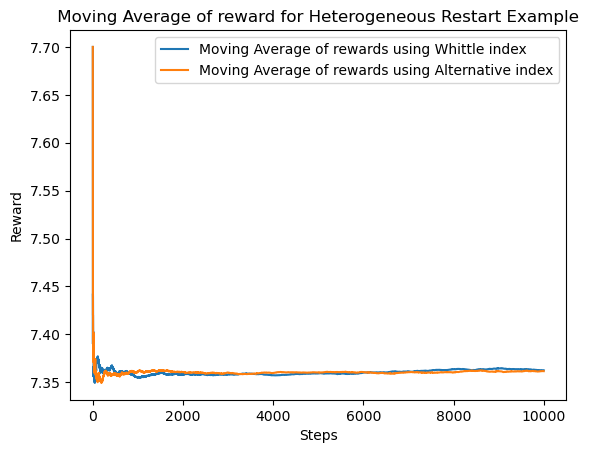

In [24]:
df_rewards=pd.DataFrame()
df_rewards['reward_whittle']=reward_sums_whittle_index
df_rewards['reward_alternate']=reward_sums_alt_index

plt.plot(df_rewards['reward_whittle'][:100000].rolling(5000,min_periods=1).mean(),label='Moving Average of rewards using Whittle index')
plt.plot(df_rewards['reward_alternate'][:100000].rolling(5000,min_periods=1).mean(),label='Moving Average of rewards using Alternative index')
plt.xlabel('Steps')
plt.ylabel('Reward')
plt.legend()
plt.title(' Moving Average of reward - Restart Arms (Heterogeneous) ')

Text(0.5, 1.0, ' Moving Average of reward - Restart Arms (Heterogeneous) ')

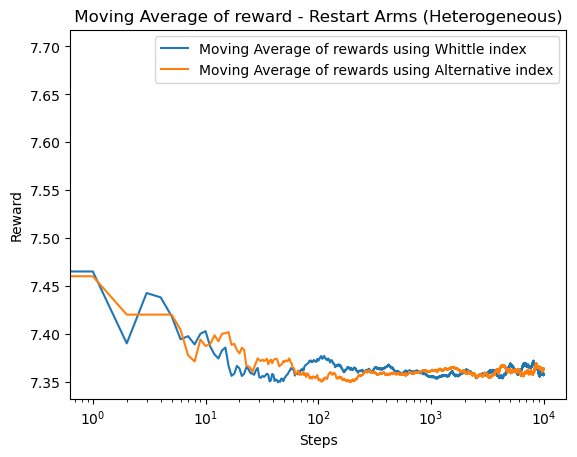

In [25]:
x=[ i for i in range(len(reward_sums_whittle_index))]
plt.semilogx(x,df_rewards['reward_whittle'][:50000].rolling(1000,min_periods=1).mean(),label='Moving Average of rewards using Whittle index')
plt.semilogx(x,df_rewards['reward_alternate'][:50000].rolling(1000,min_periods=1).mean(),label='Moving Average of rewards using Alternative index')
plt.xlabel('Steps')
plt.ylabel('Reward')
plt.legend()
plt.title(' Moving Average of reward - Restart Arms (Heterogeneous) ')

In [26]:
len(reward_sums_alt_index)

10000